In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import ReLU
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
ddf = pd.read_csv('all_faults.csv')

In [4]:
ddf.shape

(1975680, 2)

In [5]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=1000
stride=200

X=[]
Y=[]


for k in ddf['fault'].unique():
    
    df_temp_2 = ddf[ddf['fault']==k]
    
    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],win_len))



Y=np.array(Y)
encode= LabelEncoder()
encode.fit(Y)
encoded_Y = encode.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [6]:
np.shape(X)

(9855, 1000)

In [7]:
OHE_Y.shape

(9855, 5)

In [8]:
OHE_Y.shape

(9855, 5)

In [9]:
sample_size=X.shape[0]
time_steps=X.shape[1]
input_dimension=1
X_reshaped=X.reshape(sample_size,time_steps,input_dimension)

print("After reshape:\n",X_reshaped.shape)
print(X_reshaped.shape[0])
print(X_reshaped.shape[1])
print(X_reshaped.shape[2])
print("Sample shape:\n",X_reshaped[0].shape)
print("An example sample :\n",X_reshaped[0])

After reshape:
 (9855, 1000, 1)
9855
1000
1
Sample shape:
 (1000, 1)
An example sample :
 [[ 2.1140920e-01]
 [ 2.0000000e-01]
 [ 1.7990224e-01]
 [ 1.9301009e-01]
 [ 2.2547908e-01]
 [ 1.3612925e-01]
 [ 8.9349844e-02]
 [ 1.5392706e-01]
 [ 7.2634332e-02]
 [-7.7805318e-02]
 [ 3.5836142e-02]
 [ 1.4358509e-01]
 [ 1.0474255e-01]
 [-1.7509203e-01]
 [-2.3353620e-01]
 [ 3.3671540e-03]
 [-7.4077398e-02]
 [-2.5061250e-01]
 [-1.1520478e-01]
 [-1.1496427e-01]
 [-4.5576841e-02]
 [ 1.4310406e-02]
 [ 3.2216451e-01]
 [ 3.0797437e-01]
 [ 4.7861695e-02]
 [ 1.0257795e-01]
 [ 2.4171358e-02]
 [-2.0287105e-01]
 [-1.3829383e-01]
 [ 2.3185262e-01]
 [-3.4513332e-02]
 [-4.9364889e-01]
 [-2.6576468e-01]
 [-1.8940243e-01]
 [-2.9558805e-01]
 [-3.1374663e-01]
 [-3.6846289e-01]
 [-4.8559177e-01]
 [ 7.1792543e-02]
 [ 4.6983829e-01]
 [ 3.7435541e-01]
 [ 2.5518221e-01]
 [ 6.0175860e-01]
 [ 4.5167971e-01]
 [ 1.6390826e-01]
 [ 2.8596762e-01]
 [ 3.5042456e-01]
 [ 3.0893642e-01]
 [ 3.8794428e-01]
 [ 3.4272820e-01]
 [ 1.05704

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.4,shuffle=False)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

(5913, 1000)
(3942, 1000)
(5913, 5)
(3942, 5)
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [12]:
X_pre_aen = X
X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(X_pre_aen )

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9855 samples in 0.013s...


C:\Users\abulf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 9855 samples in 3.474s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9855
[t-SNE] Computed conditional probabilities for sample 2000 / 9855
[t-SNE] Computed conditional probabilities for sample 3000 / 9855
[t-SNE] Computed conditional probabilities for sample 4000 / 9855
[t-SNE] Computed conditional probabilities for sample 5000 / 9855
[t-SNE] Computed conditional probabilities for sample 6000 / 9855
[t-SNE] Computed conditional probabilities for sample 7000 / 9855
[t-SNE] Computed conditional probabilities for sample 8000 / 9855
[t-SNE] Computed conditional probabilities for sample 9000 / 9855
[t-SNE] Computed conditional probabilities for sample 9855 / 9855
[t-SNE] Mean sigma: 1.360189
[t-SNE] KL divergence after 50 iterations with early exaggeration: 92.283401
[t-SNE] KL divergence after 300 iterations: 2.444959


In [13]:
tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['t-SNE component 1', 't-SNE component 2'])
tSNEdf['Fault']=Y

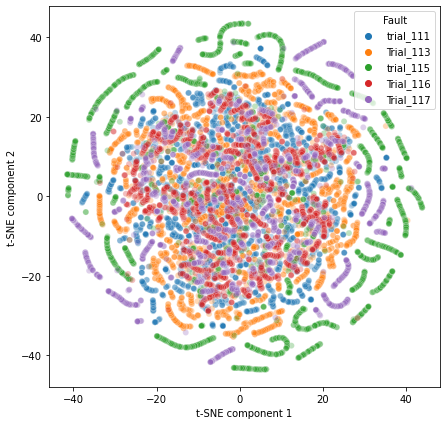

In [14]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=tSNEdf['t-SNE component 1'],y=tSNEdf['t-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

In [15]:
tSNEdf

,t-SNE component 1,t-SNE component 2,Fault
0,-14.289023,-8.038174,trial_111
1,15.050807,-25.041338,trial_111
2,32.802464,4.782529,trial_111
3,-10.980991,7.841297,trial_111
4,-16.334982,8.412814,trial_111
...,...,...,...
9850,29.309383,-4.470405,Trial_117
9851,12.760619,2.400855,Trial_117
9852,24.104582,23.893644,Trial_117
9853,-2.951871,7.351338,Trial_117


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten



no_classes=len(encode.classes_)
model = Sequential()
model.add(SimpleRNN(1024, return_sequences=True, input_shape=(X_reshaped.shape[1],1), activation='tanh'))
model.add(SimpleRNN(512, return_sequences=False, activation='tanh'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1000, 1024)        1050624   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 512)               786944    
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 2,010,373
Trainable params: 2,010,373
Non-

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=50, 
                    batch_size=128,
                    shuffle=False,
                    validation_data=(X_test,y_test),
                    verbose=1)

Epoch 1/50
47/47 [==============================] - 1517s 33s/step - loss: 3.5962 - accuracy: 0.4597 - val_loss: 2.2988 - val_accuracy: 0.0000e+00
Epoch 2/50
23/47 [=============>................] - ETA: 11:30 - loss: 1.8777 - accuracy: 0.5499

In [104]:
X_pre_aen = encoder.predict(X)
X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(X_pre_aen )

C:\Users\abulf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9855 samples in 0.005s...
[t-SNE] Computed neighbors for 9855 samples in 2.291s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9855
[t-SNE] Computed conditional probabilities for sample 2000 / 9855
[t-SNE] Computed conditional probabilities for sample 3000 / 9855
[t-SNE] Computed conditional probabilities for sample 4000 / 9855
[t-SNE] Computed conditional probabilities for sample 5000 / 9855
[t-SNE] Computed conditional probabilities for sample 6000 / 9855
[t-SNE] Computed conditional probabilities for sample 7000 / 9855
[t-SNE] Computed conditional probabilities for sample 8000 / 9855
[t-SNE] Computed conditional probabilities for sample 9000 / 9855
[t-SNE] Computed conditional probabilities for sample 9855 / 9855
[t-SNE] Mean sigma: 1.428941
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.469292
[t-SNE] KL divergence after 300 iterations: 2.970801


In [105]:
tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['t-SNE component 1', 't-SNE component 2'])
tSNEdf['Fault']=Y

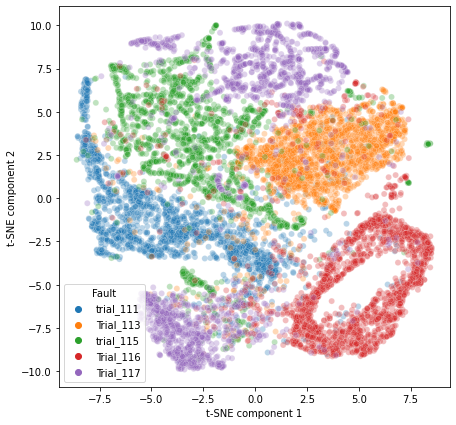

In [106]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=tSNEdf['t-SNE component 1'],y=tSNEdf['t-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

In [107]:
X=encoder.predict(X)

In [116]:
tSNEdf

,t-SNE component 1,t-SNE component 2,Fault
0,-8.011039,3.664180,trial_111
1,-4.543613,-2.569935,trial_111
2,-7.445730,-1.978859,trial_111
3,-8.219574,6.661963,trial_111
4,-3.315465,-2.310480,trial_111
...,...,...,...
9850,3.650554,7.923186,Trial_117
9851,-2.789228,5.679547,Trial_117
9852,2.223621,8.007564,Trial_117
9853,1.031999,2.759811,Trial_117


In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten



no_classes=len(encode.classes_)
model = Sequential()
model.add(SimpleRNN(125, input_shape=(125,input_dimension), activation='tanh'))
model.add(SimpleRNN(250, input_shape=(250,input_dimension), activation='tanh'))
model.add(SimpleRNN(500, input_shape=(500,input_dimension), activation='tanh'))
model.add(SimpleRNN(750, input_shape=(750,input_dimension), activation='tanh'))
model.add(SimpleRNN(1000, input_shape=(1000,input_dimension), activation='tanh'))
model.add(SimpleRNN(no_classes, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ValueError: Input 0 of layer "simple_rnn_36" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 125)

In [90]:
n_inputs = X_reshaped.shape[1]
input_data_shape= Input(shape=(n_inputs,))
model = Sequential()
model.add(SimpleRNN(1000, input_data_shape))
model.add(Dropout(rate=0.2))
model.add(SimpleRNN(500, input_data_shape, activation='tanh'))
model.add(Dropout(rate=0.2))
model.add(SimpleRNN(250, input_data_shape, activation='tanh'))
model.add(Dropout(rate=0.2))
model.add(SimpleRNN(125, input_data_shape, activation='tanh'))
model.add(Dropout(rate=0.2))
model.add(SimpleRNN(250, input_data_shape, activation='tanh'))
model.add(Dropout(rate=0.2))
model.add(SimpleRNN(500, input_data_shape, activation='tanh'))
model.add(Dropout(rate=0.2))
model.add(SimpleRNN(1000, input_data_shape, activation='tanh'))
model.add(Dropout(rate=0.2))

TypeError: Exception encountered when calling layer "tf.keras.activations.get_1" (type TFOpLambda).

Could not interpret activation function identifier: Tensor("Placeholder:0", shape=(None, 1000), dtype=float32)

Call arguments received:
  • identifier=tf.Tensor(shape=(None, 1000), dtype=float32)

ValueError: Input 0 of layer "simple_rnn_16" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1000)

In [33]:
train['DE_data'] = scaler.transform(train[['DE_data']])
test['DE_data'] = scaler.transform(test[['DE_data']])

seq_size = 3000 

def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(len(x)-seq_size):
        #print(i)
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])
        
    return np.array(x_values), np.array(y_values)

trainX, trainY = to_sequences(train[['DE_data']], train['DE_data'], seq_size)
testX, testY = to_sequences(test[['DE_data']], test['DE_data'], seq_size)

<ipython-input-33-e6dbd401009f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DE_data'] = scaler.transform(train[['DE_data']])
<ipython-input-33-e6dbd401009f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['DE_data'] = scaler.transform(test[['DE_data']])


In [37]:
model = Sequential()
model.add(SimpleRNN(1000, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(trainX.shape[1]))

model.add(SimpleRNN(1000, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1000)              1002000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 repeat_vector (RepeatVector  (None, 3000, 1000)       0         
 )                                                               
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 3000, 1000)        2001000   
                                                                 
 dropout_1 (Dropout)         (None, 3000, 1000)        0         
                                                                 
 time_distributed (TimeDistr  (None, 3000, 1)          1001      
 ibuted)                                                

In [39]:
history = model.fit(trainX, trainY, epochs=50, batch_size=128, validation_split=0.1, verbose=1)



Epoch 1/50


ResourceExhaustedError: Graph execution error:

Detected at node 'Adam/gradients/zeros_like_1' defined at (most recent call last):
    File "C:\Users\abulf\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\abulf\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\abulf\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\abulf\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\abulf\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\abulf\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\abulf\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\abulf\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\abulf\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\abulf\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\abulf\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
      ret = callback()
    File "C:\Users\abulf\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
      self.run()
    File "C:\Users\abulf\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "C:\Users\abulf\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\abulf\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\abulf\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\abulf\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\abulf\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\abulf\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\abulf\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\abulf\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\abulf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
      result = self._run_cell(
    File "C:\Users\abulf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
      return runner(coro)
    File "C:\Users\abulf\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\abulf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\abulf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\abulf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-38-1119ed1fa5d1>", line 1, in <module>
      history = model.fit(trainX, trainY, epochs=50, batch_size=128, validation_split=0.1, verbose=1)
    File "C:\Users\abulf\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\abulf\anaconda3\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\abulf\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\abulf\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\abulf\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\abulf\anaconda3\lib\site-packages\keras\engine\training.py", line 863, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\abulf\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 530, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\abulf\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 583, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\abulf\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 464, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'Adam/gradients/zeros_like_1'
OOM when allocating tensor with shape[128,1000] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node Adam/gradients/zeros_like_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_2300]

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()